In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.compat import *
import seaborn as sns
import math
%matplotlib inline


In [129]:
file = open("movies.dat",mode='r+',encoding='latin1').readlines()

In [130]:
file

["1::Toy Story (1995)::Animation|Children's|Comedy\n",
 "2::Jumanji (1995)::Adventure|Children's|Fantasy\n",
 '3::Grumpier Old Men (1995)::Comedy|Romance\n',
 '4::Waiting to Exhale (1995)::Comedy|Drama\n',
 '5::Father of the Bride Part II (1995)::Comedy\n',
 '6::Heat (1995)::Action|Crime|Thriller\n',
 '7::Sabrina (1995)::Comedy|Romance\n',
 "8::Tom and Huck (1995)::Adventure|Children's\n",
 '9::Sudden Death (1995)::Action\n',
 '10::GoldenEye (1995)::Action|Adventure|Thriller\n',
 '11::American President, The (1995)::Comedy|Drama|Romance\n',
 '12::Dracula: Dead and Loving It (1995)::Comedy|Horror\n',
 "13::Balto (1995)::Animation|Children's\n",
 '14::Nixon (1995)::Drama\n',
 '15::Cutthroat Island (1995)::Action|Adventure|Romance\n',
 '16::Casino (1995)::Drama|Thriller\n',
 '17::Sense and Sensibility (1995)::Drama|Romance\n',
 '18::Four Rooms (1995)::Thriller\n',
 '19::Ace Ventura: When Nature Calls (1995)::Comedy\n',
 '20::Money Train (1995)::Action\n',
 '21::Get Shorty (1995)::Action|C

In [131]:
file1 = "movies.dat"
movies = [i.strip().split('::') for i in open(file1, encoding='latin1').readlines()]
file2 = "ratings.dat"
ratings = [i.strip().split('::',) for i in open(file2, encoding = 'latin1').readlines()]
file3 = "users.dat"
users = [i.strip().split('::') for i in open(file3, encoding = "latin1").readlines()]



In [132]:
movies

[['1', 'Toy Story (1995)', "Animation|Children's|Comedy"],
 ['2', 'Jumanji (1995)', "Adventure|Children's|Fantasy"],
 ['3', 'Grumpier Old Men (1995)', 'Comedy|Romance'],
 ['4', 'Waiting to Exhale (1995)', 'Comedy|Drama'],
 ['5', 'Father of the Bride Part II (1995)', 'Comedy'],
 ['6', 'Heat (1995)', 'Action|Crime|Thriller'],
 ['7', 'Sabrina (1995)', 'Comedy|Romance'],
 ['8', 'Tom and Huck (1995)', "Adventure|Children's"],
 ['9', 'Sudden Death (1995)', 'Action'],
 ['10', 'GoldenEye (1995)', 'Action|Adventure|Thriller'],
 ['11', 'American President, The (1995)', 'Comedy|Drama|Romance'],
 ['12', 'Dracula: Dead and Loving It (1995)', 'Comedy|Horror'],
 ['13', 'Balto (1995)', "Animation|Children's"],
 ['14', 'Nixon (1995)', 'Drama'],
 ['15', 'Cutthroat Island (1995)', 'Action|Adventure|Romance'],
 ['16', 'Casino (1995)', 'Drama|Thriller'],
 ['17', 'Sense and Sensibility (1995)', 'Drama|Romance'],
 ['18', 'Four Rooms (1995)', 'Thriller'],
 ['19', 'Ace Ventura: When Nature Calls (1995)', 'Come

In [133]:
userdf = pd.DataFrame(users,columns = ['UserID','Gender','Age','Occupation','Zip-code'])
userdf = userdf.drop(['Zip-code'],axis = 1)

In [134]:
moviesdf = pd.DataFrame(movies,columns = ['MovieID','Title','Genres'])
#moviesdf = moviesdf.drop(['Genres'],axis = 1)
moviesdf

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [135]:
ratingsdf  = pd.DataFrame(ratings, columns = ['UserID','MovieID','Rating','Timestamp'])
ratingsdf = ratingsdf.drop(['Timestamp'],axis=1)

In [136]:
Master_data = pd.merge(ratingsdf,userdf,how = 'inner', on = 'UserID' )

In [137]:
Master_data = pd.merge(Master_data,moviesdf,how='inner', on='MovieID')

In [138]:
Master_data = Master_data.reindex(columns=['UserID','MovieID','Title','Age','Gender','Occupation','Rating','Genres'])

In [139]:
#Master_data.set_index('UserID','MovieID',inplace=True)

In [140]:
Master_data

,UserID,MovieID,Title,Age,Gender,Occupation,Rating,Genres
0,1,1193,One Flew Over the Cuckoo's Nest (1975),1,F,10,5,Drama
1,2,1193,One Flew Over the Cuckoo's Nest (1975),56,M,16,5,Drama
2,12,1193,One Flew Over the Cuckoo's Nest (1975),25,M,12,4,Drama
3,15,1193,One Flew Over the Cuckoo's Nest (1975),25,M,7,4,Drama
4,17,1193,One Flew Over the Cuckoo's Nest (1975),50,M,1,5,Drama
...,...,...,...,...,...,...,...,...
1000204,5949,2198,Modulations (1998),18,M,17,5,Documentary
1000205,5675,2703,Broken Vessels (1998),35,M,14,3,Drama
1000206,5780,2845,White Boys (1999),18,M,17,1,Drama
1000207,5851,3607,One Little Indian (1973),18,F,20,5,Comedy|Drama|Western


In [141]:
Master_data.Title.tail(10)

1000199                         Song of Freedom (1936)
1000200                 Slappy and the Stinkers (1998)
1000201                       Nemesis 2: Nebula (1995)
1000202                      Smoking/No Smoking (1993)
1000203                             Modulations (1998)
1000204                             Modulations (1998)
1000205                          Broken Vessels (1998)
1000206                              White Boys (1999)
1000207                       One Little Indian (1973)
1000208    Five Wives, Three Secretaries and Me (1998)
Name: Title, dtype: object

In [119]:
#str = 'Engineer(231)Discipline'
 
#print(str.translate({ord(i): None for i in '123()'}))

In [120]:
#list = []
#for x in Master_data.Title:
#    list.append(x.translate({ord(i): None for i in '1234567890()'}))
#
#len(list)


In [142]:
list1 = []
for input_str in Master_data.Title:
    list1.append(input_str[0:len(input_str)-7])
    
listdf = pd.DataFrame(list1,columns = ['MovieTitle'])
listdf

,MovieTitle
0,One Flew Over the Cuckoo's Nest
1,One Flew Over the Cuckoo's Nest
2,One Flew Over the Cuckoo's Nest
3,One Flew Over the Cuckoo's Nest
4,One Flew Over the Cuckoo's Nest
...,...
1000204,Modulations
1000205,Broken Vessels
1000206,White Boys
1000207,One Little Indian


In [143]:
Master_data = Master_data.drop(['Title'],axis=1)


In [144]:
Master_data = pd.concat([Master_data,listdf],axis=1)

In [145]:
Master_data = Master_data.reindex(columns=['UserID','MovieID','MovieTitle','Title','Age','Gender','Occupation','Rating','Genres'])

In [146]:
Master_data

,UserID,MovieID,MovieTitle,Title,Age,Gender,Occupation,Rating,Genres
0,1,1193,One Flew Over the Cuckoo's Nest,NaN,1,F,10,5,Drama
1,2,1193,One Flew Over the Cuckoo's Nest,NaN,56,M,16,5,Drama
2,12,1193,One Flew Over the Cuckoo's Nest,NaN,25,M,12,4,Drama
3,15,1193,One Flew Over the Cuckoo's Nest,NaN,25,M,7,4,Drama
4,17,1193,One Flew Over the Cuckoo's Nest,NaN,50,M,1,5,Drama
...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,Modulations,NaN,18,M,17,5,Documentary
1000205,5675,2703,Broken Vessels,NaN,35,M,14,3,Drama
1000206,5780,2845,White Boys,NaN,18,M,17,1,Drama
1000207,5851,3607,One Little Indian,NaN,18,F,20,5,Comedy|Drama|Western


In [147]:
Genre = np.unique('|'.join(Master_data['Genres']).split('|'))
for x in Genre:
    Master_data[x] = Master_data['Genres'].str.contains(x).astype('int')

In [150]:
#Master_data

In [151]:
Master_data.drop(['Genres'],axis=1)

,UserID,MovieID,MovieTitle,Title,Age,Gender,Occupation,Rating,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,One Flew Over the Cuckoo's Nest,NaN,1,F,10,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,One Flew Over the Cuckoo's Nest,NaN,56,M,16,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,One Flew Over the Cuckoo's Nest,NaN,25,M,12,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,One Flew Over the Cuckoo's Nest,NaN,25,M,7,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,One Flew Over the Cuckoo's Nest,NaN,50,M,1,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,Modulations,NaN,18,M,17,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,Broken Vessels,NaN,35,M,14,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,White Boys,NaN,18,M,17,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,One Little Indian,NaN,18,F,20,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [157]:
def convert(age):
    return int(age)

In [158]:
Master_data['Age'] = Master_data['Age'].apply(convert)
Master_data['Rating']=Master_data['Rating'].apply(convert)

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

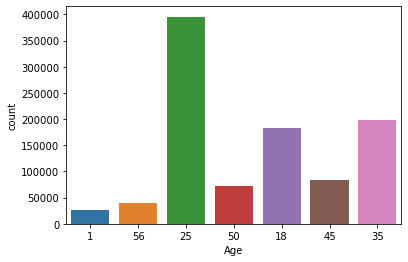

In [152]:
age_plot = sns.countplot(x='Age',data=Master_data)
age_distribution = Master_data['Age'].value_counts()
age_distribution

<AxesSubplot:xlabel='Age', ylabel='Rating'>

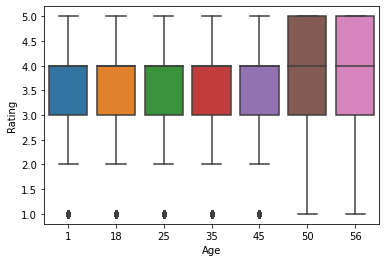

In [159]:
sns.boxplot(x='Age',y='Rating',data=Master_data)

<AxesSubplot:xlabel='Age', ylabel='Rating'>

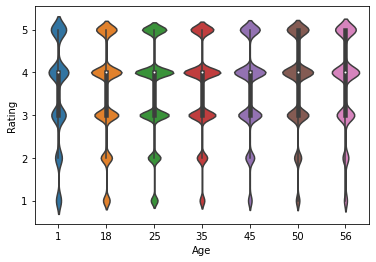

In [160]:
sns.violinplot(x='Age',y='Rating',data=Master_data)

Most of the ratings were given by users Of age group 25 , 35 ,18
People of age Group 1,18,25,35,45 have given ratings mostly between 3 and 4 and people of age group 50,56 have given ratings mostly between 3 and 5.

In [161]:
#x = Master_data.loc['17','MovieID']

In [162]:
#x

In [164]:
Toy_story_df = Master_data[Master_data['MovieTitle']=='Toy Story']

In [168]:
Toy_story_df.describe()

,Title,Age,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,0.0,2077.000000,2077.000000,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,...,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0
mean,NaN,27.700530,4.146846,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,11.803826,0.852349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,1.000000,1.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,NaN,18.000000,4.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,25.000000,4.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,NaN,35.000000,5.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,NaN,56.000000,5.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Minimum Rating given to movie "Toy Story" = 1
Maximum Rating given to movie "Toy Story" = 5
Average Rating given to movie "Toy Story" = 4.1
Maximum number Of Rating given to movie "Toy Story" = 4


In [215]:
#Master_data['Rating'].replace('1',1, inplace=True)
#Master_data['Rating'].replace('2',2, inplace=True)
#Master_data['Rating'].replace('3',3, inplace=True)
#Master_data['Rating'].replace('4',4, inplace=True)
#Master_data['Rating'].replace('5',5, inplace=True)

In [216]:
#Master_data['Gender'].replace('F',0,inplace=True)
#Master_data['Gender'].replace('M',1,inplace=True)

In [219]:
#x = Master_data.loc[Master_data['Age']=='56']

In [220]:
#x

In [221]:
#Occupation_grouped = Master_data.groupby('Occupation').mean()


In [222]:
#Occupation_grouped

In [223]:
#gender_grouped = Master_data.groupby('Gender').mean()

In [224]:
#gender_grouped

In [225]:
#age_grouped = Master_data.groupby('Age').mean()

In [226]:
#age_grouped

In [227]:
#genre_grouped = Master_data.groupby('Genres').mean()

In [228]:
#genre_grouped

In [229]:
#sns.regplot(x='Age',y='Rating',data=Master_data)

In [230]:
#plot = sns.barplot(x='MovieID',y='Rating',hue='Gender',data=Master_data)

#plot.set_xticklabels(plot.get_xticklabels(),rotation=40)

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

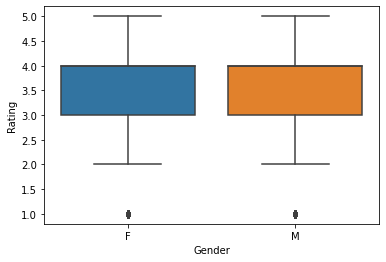

In [231]:
sns.boxplot(x='Gender',y='Rating',data=Master_data)

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

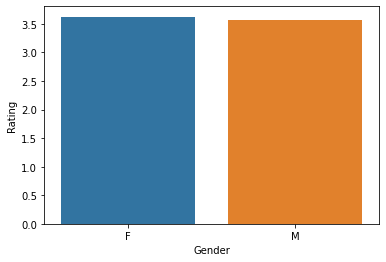

In [232]:
sns.barplot(x='Gender',y='Rating',data=Master_data)

<AxesSubplot:xlabel='Rating', ylabel='Gender'>

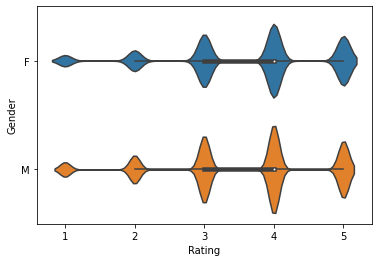

In [247]:
sns.violinplot(x='Rating',y='Gender',data=Master_data)

<AxesSubplot:xlabel='Age', ylabel='Rating'>

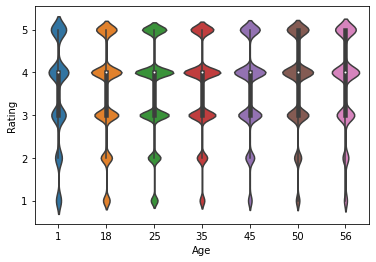

In [233]:
sns.violinplot(x='Age',y='Rating',data=Master_data)

<AxesSubplot:xlabel='Age', ylabel='Rating'>

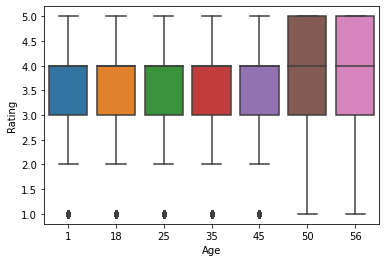

In [234]:
sns.boxplot(x='Age',y='Rating',data=Master_data)

<AxesSubplot:xlabel='Occupation', ylabel='Rating'>

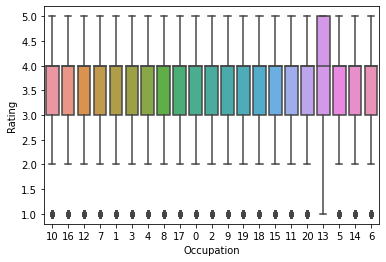

In [235]:
sns.boxplot(x='Occupation',y='Rating',data=Master_data)

In [236]:
#sns.boxenplot(x='Occupation',y='Rating',data=Master_data)

<AxesSubplot:xlabel='Occupation', ylabel='Rating'>

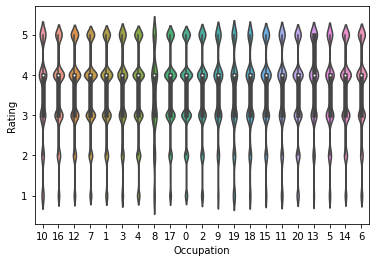

In [237]:
sns.violinplot(x='Occupation',y='Rating',data=Master_data)

In [248]:
#Master_data_dummied = pd.get_dummies(Master_data,columns=['Gender'],drop_first=True)

In [249]:
#Master_data_dummied

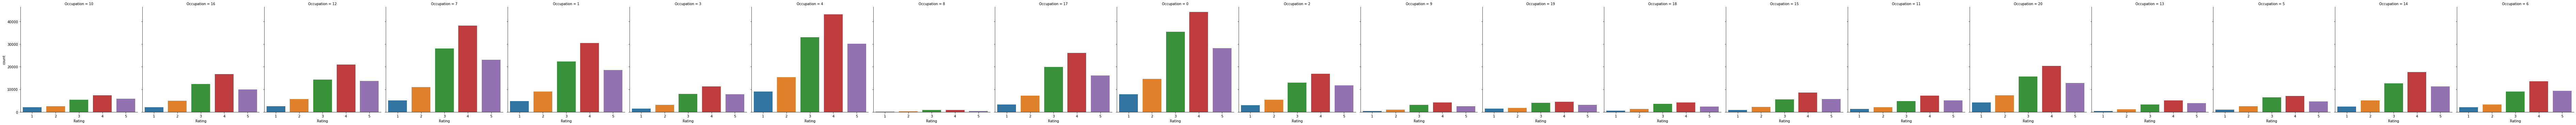

In [242]:
sns.catplot(x='Rating',col='Occupation',kind='count',data=Master_data_dummied)

In [ ]:
#contigency_table = pd.crosstab(df_chi['Gender'],df_chi['Shopping?'])

#from scipy.stats import chi2_contingency
#b = chi2_contingency(contigency_table)
#Expected_Values = b[3]
#Degree_of_Freedom = b[2]
#Chi_Square_Statistic_Value = b[0]

##########################################################


#alpha = 0.05
#from scipy.stats import chi2
#critical_value= chi2.ppf(q=1-alpha,df=1)
#p_value = 1 - chi2.cdf(x=Chi_Square_Statistic_Value,df=1)

In [276]:
table1 = pd.crosstab(Master_data['Gender'],Master_data['Rating'])

In [277]:
from scipy.stats import chi2_contingency

b= chi2_contingency(table1)
Chi_static_value = b[0]

alpha = 0.05

from scipy.stats import chi2

critical_value = chi2.ppf(q=1-alpha,df=1)

p_value = 1-chi2.cdf(x=Chi_static_value,df=1)
p_value





0.0

In [278]:
b

(455.860738111417,
 2.348561132924984e-97,
 4,
 array([[ 13840.62786878,  26500.80841104,  64355.9382889 ,
          85982.44290943,  55760.18252185],
        [ 42333.37213122,  81056.19158896, 196841.0617111 ,
         262988.55709057, 170549.81747815]]))

In [279]:
critical_value

3.841458820694124

In [280]:
Chi_static_value

455.860738111417

Rating of Movie are not dependent on Gender
Age affects Rating of Movies
Occupation affects Ratings Of Movies

In [173]:
#Master_data = Master_data.drop('Title',axis=1)
#pd.concat(Master_data,listdf,axis=1)

In [ ]:
#all_genre = []
#for x in Master_data.Title:
#    all_genre.extend(x.split('('))
#    
#
#len(all_genre)

In [ ]:
#all_genre

In [ ]:
#all_genre = []
#for x in moviesdf.Genres:
#    all_genre.extend(x.split('|'))
#    
#genres = pd.unique(all_genre)
#genres
#all_genre

In [ ]:
#genres = pd.unique(all_genre)
#genres
#all_genre
#all_title = []
#for x in all_genre:
#    all_title.extend(x.split(')'))


#all_title[-5:]

In [ ]:
#len(all_title)

In [ ]:
#final_title = []
#year =[]
#spaces =[]
#for x in range(len(all_title)):
#    if x % 3 == 0:
#         final_title.append(all_title[x])
#    elif x % 3 == 1:
#        year.append(all_title[x])
#    else:
#        spaces.append(all_title[x])
#        
#        
#spaces

In [ ]:
#final_title[-10:]

In [ ]:
#year

In [ ]:
#zero_matrix = np.zeros((len(movies),len(genres)))
#dummies = pd.DataFrame(zero_matrix, columns=genres)
#dummies

In [ ]:
#for i,gen in enumerate(Master_data.Genres):
#    indices = dummies.columns(gen.split('|'))
#    dummies.loc[i,indices] = 1

In [ ]:
#Master_data['MovieTitle']

In [ ]:
#Master_data['Rating'].replace('1',1, inplace=True)
#Master_data['Rating'].replace('2',2, inplace=True)
#Master_data['Rating'].replace('3',3, inplace=True)
#Master_data['Rating'].replace('4',4, inplace=True)
#Master_data['Rating'].replace('5',5, inplace=True)

In [ ]:
#Master_data_grouped = Master_data.groupby('MovieTitle')

In [ ]:
#Master_data_grouped.head()

In [ ]:
#Toystorydf = Master_data[['Rating','MovieTitle']]

In [ ]:
#Toystorydf

In [ ]:
#Toystorydf.set_index('MovieTitle',inplace=True)


In [ ]:
#movie_ratings= Toystorydf.groupby('MovieTitle').mean()

In [ ]:
#movie_ratings.sort_values(by='Rating',ascending=False).head(25)

In [ ]:
#ToystorydfUpdated = pd.concat([pd.get_dummies(Toystorydf.Rating), Toystorydf.iloc[:,[1]]] , axis = 1)

In [ ]:
#ToystorydfUpdated

In [ ]:
# print(df.iloc[:,1:4])

In [ ]:
#Toystorydf_new = Toystorydf.query('MovieTitle == "Toy Story"')

In [ ]:
#Toystory_plot = sns.countplot(x='Rating',data=Toystorydf_new)

In [ ]:
#Toystorydf_new.describe()

In [169]:
userid2696 = Master_data.query('UserID == "2696"')

In [171]:
userid2696.describe()

,Title,Age,Rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,0.0,20.0,20.000000,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.0,...,20.000000,20.000000,20.000000,20.0,20.000000,20.0,20.000000,20.00000,20.0,20.0
mean,NaN,25.0,3.300000,0.0,0.0,0.0,0.050000,0.100000,0.300000,0.0,...,0.050000,0.100000,0.300000,0.0,0.750000,0.0,0.100000,0.65000,0.0,0.0
std,NaN,0.0,1.128576,0.0,0.0,0.0,0.223607,0.307794,0.470162,0.0,...,0.223607,0.307794,0.470162,0.0,0.444262,0.0,0.307794,0.48936,0.0,0.0
min,NaN,25.0,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0
25%,NaN,25.0,2.750000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.00000,0.0,0.0
50%,NaN,25.0,4.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.00000,0.0,0.0
75%,NaN,25.0,4.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.000000,1.00000,0.0,0.0
max,NaN,25.0,5.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.00000,0.0,0.0


User Id '2696' have given ratings to '20' movies
User ID '2696' have given an avrage rating of '3.3' to movies.

In [ ]:
#sns.heatmap(Master_data.corr(),annot=True)

In [601]:
#sns.heatmap(Master_data.corr(),annot=True)

#plt.figure(figsize=(8,6))
#dataframe.MaritalStatus.value_counts().plot(kind='bar',alpha=.5)
#plt.show()

In [545]:
#plt.figure(figsize=(8,6))
#Master_data.Rating.value_counts().plot(kind='bar',alpha=.5)
#plt.show()

In [ ]:
#plt.figure(figsize=(14,10))
#plt.scatter(dataframe.Attrition,dataframe.Age, alpha=.55)
#plt.title("Attrition by Age ")
#plt.ylabel("Age")
#plt.grid(b=True, which='major',axis='y')
#plt.show()

In [675]:
#Master_data1 = Master_data.copy()                                                            # Create copy of DataFrame
#Master_data1['Occupation'] = Master_data1['Occupation'].astype(int) 
#Master_data1['Age'] = Master_data1['Age'].astype(int)
#Master_data1['MovieID'] = Master_data1['MovieID'].astype(int)
#Master_data1['UserID'] = Master_data1['UserID'].astype(int)


In [676]:
#Master_data1.set_index('UserID','MovieID',inplace=True)

In [172]:
#Master_data1

<AxesSubplot:>

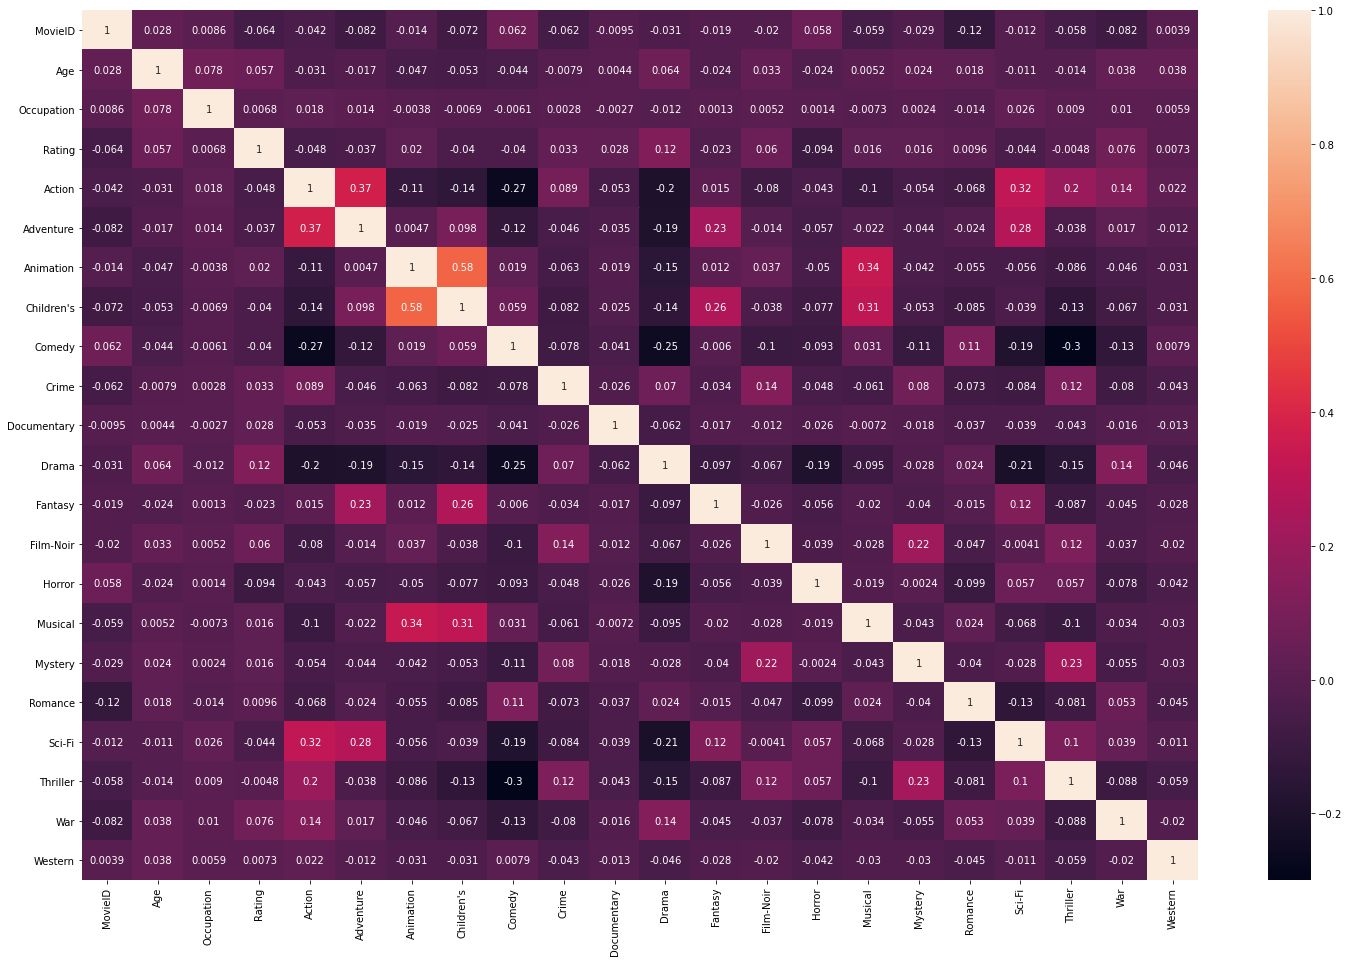

In [681]:
#plt.figure(figsize = (25,16))
#sns.heatmap(Master_data1.corr(),annot=True)